# Welcome to Tabular Classification/Regression

## This is the instruction for advanced user of Tabular classification/regression

In [8]:
from wrapping import Wrapper

아래는 ALO 기본 설정 및 라이브러리 설치 코드입니다. 설치 에러가 발생하면 아래 셀을 재실행 하고, 지속적으로 문제가 있을 시 문의바랍니다

## Train workflow 

In [9]:
# 아래는 Train 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(0)

[2023-11-08 07:03:01,130][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-08 07:03:01,134][PROCESS][INFO]:  Skip loading external data. << /nas001/users/yoonji.suh/tcr_test_20231016/train_multiclass/ >> 
 << train_multiclass >> already exists in << /home/jovyan/project/alo_dev/tcr/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-08 07:03:01,184][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-08 07:03:01,198][PROCESS][INFO]: << input >> asset had already been created at 2023-11-08 01:28:00.751822
[2023-11-08 07:03:01,202][PROCESS][INFO]: Start setting-up << preprocess >> asset @ << assets >> directory.
[2023-11-08 07:03:01,230][PROCESS][INFO]: << preprocess >> asset had already been created a

  You can safely remove it manually.
  You can safely remove it manually.


[2023-11-08 07:03:22,764][PROCESS][INFO]: ======================================== Finish dependency installation 



### 본 문서는 TCR train asset에 대한 활용 가이드입니다.

### input(step=0)~sampling(step=2)까지 한 번에 실행합니다.
### step을 별도 입력하지 않아도 run method 내부에서 알아서 다음 step으로 넘어갑니다.

In [10]:
# TCR train asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - sampling(2) - train(3))
## input asset
wrapper.run()

## preprocess asset
wrapper.run()

## sampling asset
wrapper.run()

[2023-11-08 07:03:22,819][USER][INFO][train_pipeline][input]: >> Load path : ['/home/jovyan/project/alo_dev/tcr/alo//input/train_multiclass/']


[2023-11-08 07:03:22,815][ASSET][INFO][train_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 07:03:22
- current step      : input
- asset branch.     : tabular_2.0
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'x_columns', 'use_all_x', 'y_column', 'groupkey_columns', 'drop_columns', 'time_column', 'concat_dataframes', 'encoding'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])




[2023-11-08 07:03:22,843][USER][INFO][train_pipeline][input]: >> The file for batch data has been loaded. (File name: /home/jovyan/project/alo_dev/tcr/alo//input/train_multiclass/iris.csv)
[2023-11-08 07:03:22,847][USER][INFO][train_pipeline][input]: ==================== Success loading dataframe ====================
[2023-11-08 07:03:22,851][USER][INFO][train_pipeline][input]: >> Drop columns from the input dataframe when set << auto >> mode or specified in the << drop_columns >> in config yaml. (dropped colums:[])
[2023-11-08 07:03:22,855][USER][INFO][train_pipeline][input]: >> Start processing ignore columns & drop columns: ['/home/jovyan/project/alo_dev/tcr/alo//input/train_multiclass/iris.csv']


Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_data.pkl
Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_config.pkl
[2023-11-08 07:03:22,873][ASSET][INFO][train_pipeline][input]: 

============================= ASSET FINISH ===========================
- time (UTC)        : 2023-11-08 07:03:22
- current step      : input
- save config. keys : dict_keys(['meta', 'data_source_type', 'time_format', 'time_column', 'x_columns', 'input_path', 'group_cnt', 'group_keys', 'y_column', 'input_asset_df_path', 'ignore_columns'])
- save data keys    : dict_keys(['dataframe'])


[2023-11-08 07:03:22,875][PROCESS][INFO]: ==================== Finish pipeline: train_pipeline / step: input
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/input_data.pkl
[2023-11-08 07:03:22,921][ASSET][INFO][train_pipeline][prep

### train asset args 변경하기

##### train asset의 args수정 및 확인

- 필요한경우 TCR_args의 항목을 ***TCR_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [11]:
# TCR train asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - sampling(2) - train(3))
tcr_args = wrapper.get_args(step=3)

# 아래 주석을 풀어 tcr_args를 수정합니다. 
# tcr_args['model_list'] = ['lgb']
tcr_args

{'model_type': 'classification',
 'data_split_method': 'cross_validate',
 'evaluation_metric': 'accuracy',
 'model_list': ['lgb', 'rf', 'cb'],
 'num_hpo': 3,
 'param_range': {'rf': {'max_depth': 6, 'n_estimators': [300, 500]},
  'gbm': {'max_depth': [5, 7], 'n_estimators': [300, 500]},
  'ngb': {'col_sample': [0.6, 0.8], 'n_estimators': [100, 300]},
  'lgb': {'max_depth': [5, 9], 'n_estimators': [300, 500]},
  'cb': {'max_depth': [5, 9], 'n_estimators': [100, 500]}},
 'shap_ratio': 1.0}

### arguments explanation

|args|explanation|default|example|data type|necessary|
|---|---|---|---|---|---|
|model_type|a type of problem|`classification`|`classification, regression`|str|yes|
|data_split_method|data splitting method for train/validation dataset|`cross_validate`|`cross_validate, train_test_split`|str|no|
|evaluation_metric|evaluation metric|`accuracy`|`accuracy, f1-score, recall, precision, mse, r2, mae, rmse`|str|yes|
|model_list|HPO candidate ML model list|`[lgb, rf, cb]`|`[lgb, rf, cb, gbm, ngb]`|list|yes|
|num_hpo|number of hyperparameter setting options|`3`|`0 ~ 10`|int|no|
|param_range|range of hyperparameters for each ML model|(see below)|(see as follows)|dict|no|
|shap_ratio|sampling rate of training dataset for shapley value calculation|`1`|`0~1`|float|no|

### A. Select a type of problem: regression or classification

If you have a numeric target data, such as quantity of product, temperature, polulation etc., your problem is a regression. Otherwise, if you have a categorical target data, your problem will be a classification.

#### model_type: regression

- model_type: regression
- evaluation_meric: 과제/데이터 성격에 맞는 옵션 설정
    - mse: mean squared error
    - r2: Coefficient of determination
    - mae: mean absolute error
    - rmse: root mean squared error

- model_list: \[lgb, rf, cb, gbm, ngb\] 중 학습하고 싶은 모델 선택
    - lgb: lightGBM
    - rf: Random Forest
    - cb: CatBoost
    - gbm: Gradient Boosting
    - ngb: Natural Gradient Boosting

In [12]:
tcr_args['model_type'] = 'regression'
tcr_args['evaluation_meric'] = 'mse'
tcr_args['model_list'] = ['lgb', 'rf', 'cb', 'gbm', 'ngb']

#### model_type: classification

- model_type: classification
- evaluation_meric: 과제/데이터 성격에 맞는 옵션 설정
    - accuracy
    - f1-score
    - recall
    - precision
- model_list: \[lgb, rf, cb, gbm(support binary only) \] 중 학습하고 싶은 모델 선택
    - lgb: lightGBM
    - rf: Random Forest
    - cb: CatBoost
    - gbm: Gradient Boosting

In [13]:
tcr_args['model_type'] = 'classification'
tcr_args['evaluation_meric'] = 'accuracy'
tcr_args['model_list'] = ['lgb', 'rf', 'cb']

### B. Select data splitting method: train_test_split or cross_validate

Resource Usage and Performance Trade-offs for Machine Learning. If you have limited resource, then you can split just once training/validattion dataset by selecting `train_test_split` option. If you have enough resource, K-fold cross validation prevent over/under estimation of trained model so we recommend `cross_validate` option.

In [14]:
# tcr_args['data_split_method'] = 'train_test_split'
tcr_args['data_split_method'] = 'cross_validate'

### C. Customize Hyperparameter Optimization

If you are professional to customize hyperparameter of each machine learning models, you may change default hyperparameter settings. Usually, higher value of n_estimators and max_depth increases model complexity and training time. If you exclude some model in `model_list`, corresponding model's setting in `param_range` will be ignored. Overall hyperparameter min-max range will split into `num_hpo` parameter options.

In [15]:
# setting about gbm, ngb will be ignored
tcr_args['num_hpo'] = 5
tcr_args['param_range'] = {
    'rf': {'max_depth': 6, 'n_estimators': [100, 500]},
    'gbm': {'max_depth': [5, 9], 'n_estimators': [100, 500]},
    'ngb': {'col_sample': [0.4, 0.9], 'n_estimators': [100, 500]},
    'lgb': {'max_depth': [5, 9], 'n_estimators': [100, 500]},
    'cb': {'max_depth': [5, 9], 'n_estimators': [100, 500]}}

# in this case, rf's optimizing n_estimator options will be 100, 200, 300, 400, 500

### D. Set shapley_ratio

Calculating shapley value takes some time. If you don't need shapley value for training data or you only need estimated shapley value, then you can save calculating time by reducing data.

In [16]:
# tcr_args['shap_ratio'] = 0.5
tcr_args['shap_ratio'] = 1

##### train asset 실행 

Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/sampling_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/train_pipeline/sampling_data.pkl
[2023-11-08 07:03:28,928][ASSET][INFO][train_pipeline][train]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/
[2023-11-08 07:03:28,932][ASSET][INFO][train_pipeline][train]: Successfully got << output path >> for saving your data into csv or jpg file: 
 /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/output/train/ 
 - [NOTE] The names of output file must be fixed as << output.csv, output.jpg >> 
[2023-11-08 07:03:28,933][ASSET][INFO][train_pipeline][train]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 07:03:28
- current step      : train
- asset branch.     : tcr_dev
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. 


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[INFO] 0th-fold RandomForestClassifier_set0 모델을 학습합니다.(1/60)
[INFO] 1th-fold RandomForestClassifier_set0 모델을 학습합니다.(2/60)
[INFO] 2th-fold RandomForestClassifier_set0 모델을 학습합니다.(3/60)
[INFO] 3th-fold RandomForestClassifier_set0 모델을 학습합니다.(4/60)
[INFO] 0th-fold RandomForestClassifier_set1 모델을 학습합니다.(5/60)
[INFO] 1th-fold RandomForestClassifier_set1 모델을 학습합니다.(6/60)
[INFO] 2th-fold RandomForestClassifier_set1 모델을 학습합니다.(7/60)
[INFO] 3th-fold RandomForestClassifier_set1 모델을 학습합니다.(8/60)
[INFO] 0th-fold RandomForestClassifier_set2 모델을 학습합니다.(9/60)
[INFO] 1th-fold RandomForestClassifier_set2 모델을 학습합니다.(10/60)
[INFO] 2th-fold RandomForestClassifier_set2 모델을 학습합니다.(11/60)
[INFO] 3th-fold RandomForestClassifier_set2 모델을 학습합니다.(12/60)
[INFO] 0th-fold RandomForestClassifier_set3 모델을 학습합니다.(13/60)
[INFO] 1th-fold RandomForestClassifier_set3 모델을 학습합니다.(14/60)
[INFO] 2th-fold RandomForestClassifier_set3 모델을 학습합니다.(15/60)
[INFO] 3th-fold RandomForestClassifier_set3 모델을 학습합니다.(16/60)
[INFO] 0th-fold R

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[INFO] 평가 지표는 ( accuracy ) 를 사용합니다. 
모델 정보 로그를 저장합니다. (저장위치: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/model_selection.json)

Top 1 model file is saved: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/best_model_top0.pkl
[Score] accuracy: 0.9660
[Hyper-parameters] max_depth: 5, n_estimators: 100, n_jobs: 1, verbose: -1, 

Top 2 model file is saved: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/best_model_top1.pkl
[Score] accuracy: 0.9660
[Hyper-parameters] max_depth: 5, n_estimators: 100, verbose: 0, random_state: 1234, thread_count: 6, allow_writing_files: False, 

Top 3 model file is saved: /home/jovyan/project/alo_dev/tcr/alo//.train_artifacts/models/train/best_model_top2.pkl
[Score] accuracy: 0.9592
[Hyper-parameters] n_estimators: 100, n_jobs: 1, random_state: 1234, max_depth: 6, 

Following model is the best: LGBMClassifier_set0 / accuracy:0.9660


[INFO] Summary_plot for Train data 를 저장했습니다.

ignore columns와 X로

,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,input_x0_nan_shapley,input_x1_nan_shapley,input_x2_nan_shapley,input_x3_nan_shapley,target_encoded_nan,pred_target_encoded_nan,pred_target_encoded_nan_best0,pred_target_encoded_nan_best1,pred_target_encoded_nan_best2,prob_0,prob_1,prob_2
0,5.7,2.8,4.1,1.3,-0.006718,-0.291241,-2.753147,-1.902588,1,1,1,1,1,0.000012,0.999582,0.000406
1,5.0,2.3,3.3,1.0,-0.019352,-0.652646,-2.710782,1.282438,1,1,1,1,1,0.001734,0.998043,0.000223
2,6.5,2.8,4.6,1.5,0.005979,-0.291495,-2.729541,-1.903580,1,1,1,1,1,0.000020,0.998906,0.001074
3,6.3,2.9,5.6,1.8,0.006351,-0.278018,-2.705974,-1.915641,2,2,2,2,2,0.000008,0.000099,0.999893
4,5.1,2.5,3.0,1.1,-0.052984,-0.573770,3.002291,-2.000413,1,1,1,1,1,0.000772,0.993329,0.005899
5,6.6,3.0,4.4,1.4,0.005979,-0.251354,-2.723763,-1.933553,1,1,1,1,1,0.000003,0.999991,0.000006
6,5.5,2.5,4.0,1.3,-0.037141,-0.320705,-2.760122,-1.913649,1,1,1,1,1,0.000005,0.998959,0.001036
7,5.5,2.3,4.0,1.3,-0.037141,-0.320705,-2.760122,-1.913649,1,1,1,1,1,0.000005,0.998973,0.001022
8,5.1,3.8,1.9,0.4,-0.028426,0.575538,3.337348,3.681772,0,0,0,0,0,0.955328,0.044571,0.000101
9,5.2,2.7,3.9,1.4,-0.037056,-0.293366,-2.765118,-1.910030,1,1,1,1,1,0.000004,0.999931,0.000065


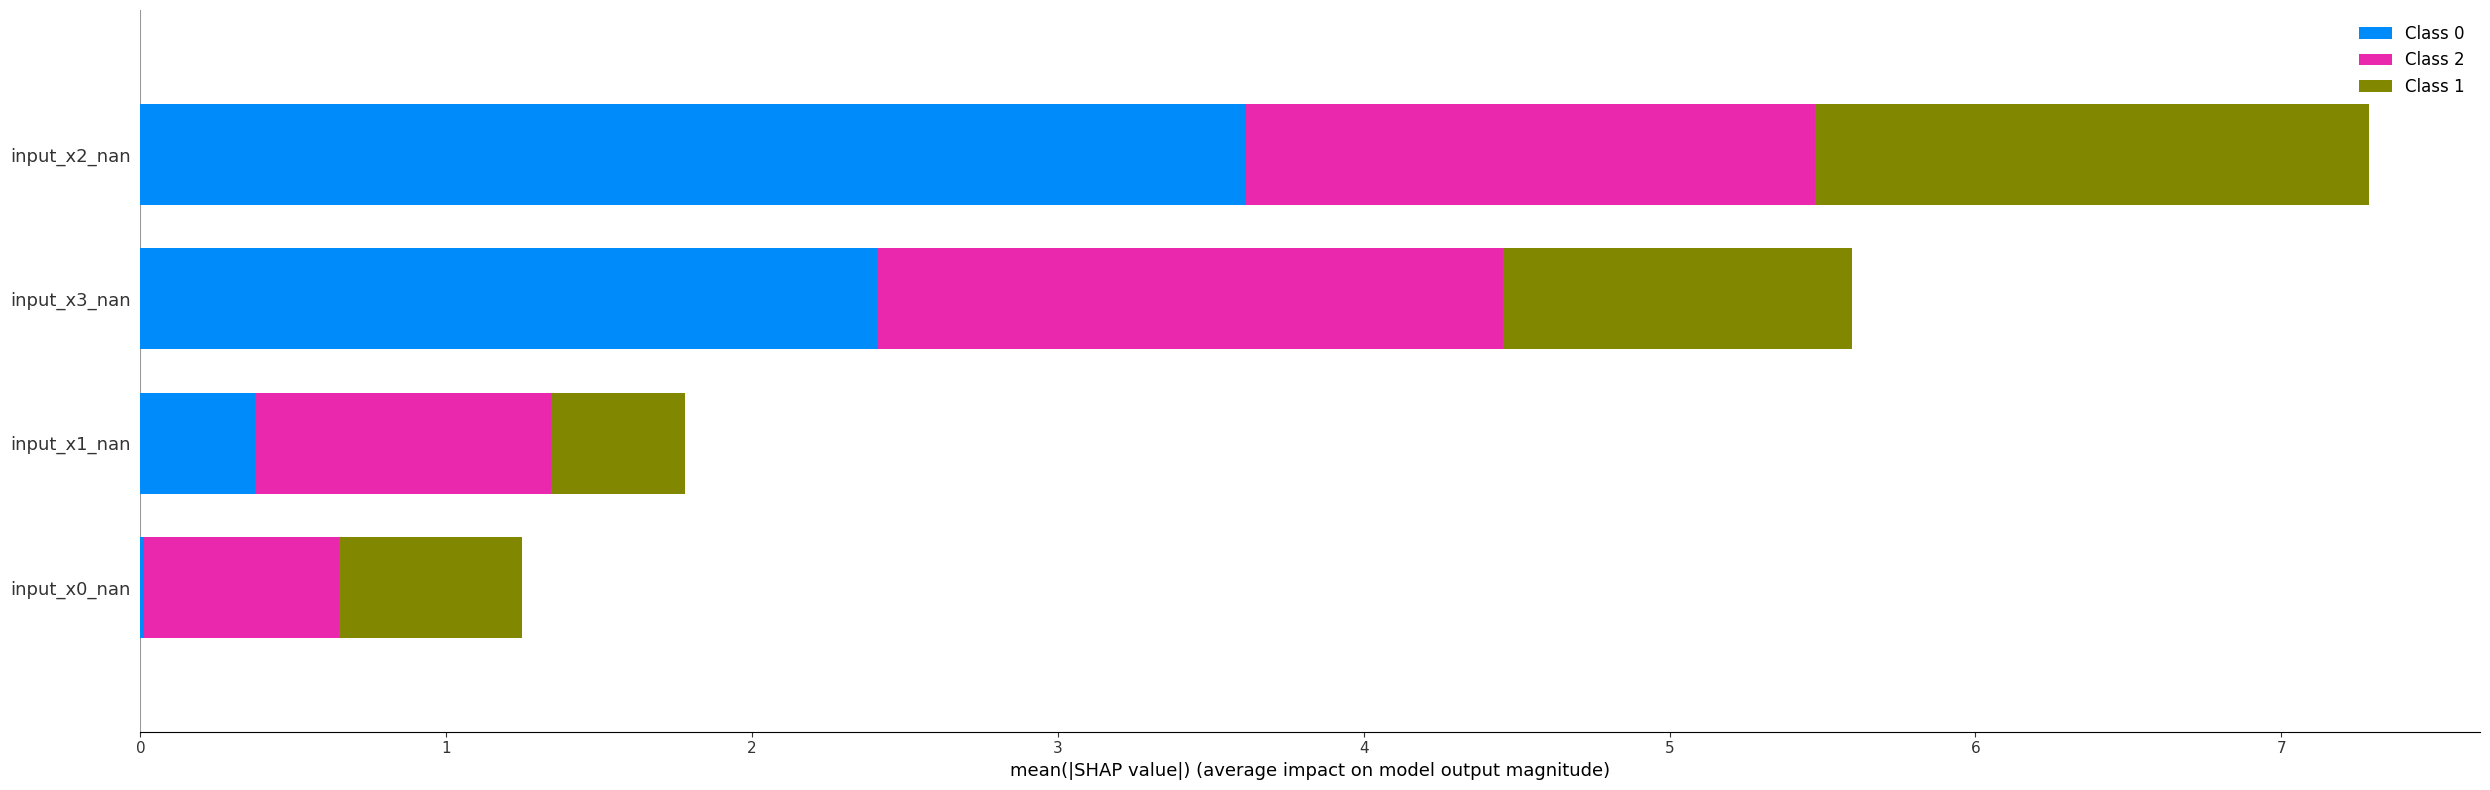

In [17]:
wrapper.run(args=tcr_args) # 변경한 tcr_args 반영
# wrapper.data: TCR asset의 결과물입니다. 
# wrapper.config: TCR asset의 결과 config입니다. 

# tcr asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

<br>

## Inference workflow 

In [18]:
# 아래는 Inference 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(1)

[2023-11-08 07:04:27,448][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-08 07:04:27,452][PROCESS][INFO]:  Skip loading external data. << /nas001/users/yoonji.suh/tcr_test_20231016/inf/ >> 
 << inf >> already exists in << /home/jovyan/project/alo_dev/tcr/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-08 07:04:27,454][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-08 07:04:27,457][PROCESS][INFO]: << input >> asset had already been created at 2023-11-08 01:28:00.751822
[2023-11-08 07:04:27,460][PROCESS][INFO]: Start setting-up << preprocess >> asset @ << assets >> directory.
[2023-11-08 07:04:27,463][PROCESS][INFO]: Now << local >> asset_source_code mode: <preprocess> asset exists.
[2023-11

In [19]:
# TCR inference asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - train(2))
## input asset
wrapper.run()

## preprocess asset
wrapper.run()

[2023-11-08 07:04:27,542][USER][INFO][inference_pipeline][input]: >> Load path : ['/home/jovyan/project/alo_dev/tcr/alo//input/inf/']
[2023-11-08 07:04:27,557][USER][INFO][inference_pipeline][input]: >> The file for batch data has been loaded. (File name: /home/jovyan/project/alo_dev/tcr/alo//input/inf/iris.csv)
[2023-11-08 07:04:27,561][USER][INFO][inference_pipeline][input]: ==================== Success loading dataframe ====================
[2023-11-08 07:04:27,565][USER][INFO][inference_pipeline][input]: >> Drop columns from the input dataframe when set << auto >> mode or specified in the << drop_columns >> in config yaml. (dropped colums:[])
[2023-11-08 07:04:27,569][USER][INFO][inference_pipeline][input]: >> Start processing ignore columns & drop columns: ['/home/jovyan/project/alo_dev/tcr/alo//input/inf/iris.csv']


[2023-11-08 07:04:27,524][ASSET][INFO][inference_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 07:04:27
- current step      : input
- asset branch.     : tabular_dev
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'x_columns', 'use_all_x', 'y_column', 'groupkey_columns', 'drop_columns', 'time_column', 'concat_dataframes', 'encoding'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/input_data.pkl
Saved : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/input_config.pkl
[2023-11-08 07:04:27,575][ASSET]

### inference asset 
##### inference asset의 args수정 및 확인
- 필요한경우 TCR_args의 항목을 ***TCR_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [20]:
# TCR inference asset 순서에 따라 step 순서를 입력합니다. (input(0) - preprocess(1) - inference(2))
tcr_args = wrapper.get_args(step=2)

# 아래 주석을 풀어 tcr_args를 수정합니다. 
# tcr_args['model_type'] = 
tcr_args

{'model_type': 'classification', 'run_shapley': True}

### arguments explanation

- model_type: Select same option as training workflow's
- run_shapley: Calcualte shapley value for inference data or not

##### inference asset 실행 

In [21]:
wrapper.run(args=tcr_args) # 변경한 preprocess_args 반영
# wrapper.data: TCR asset의 결과물입니다. 
# wrapper.config: TCR asset의 결과 config입니다. 

# tcr asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/preprocess_config.pkl
Loaded : /home/jovyan/project/alo_dev/tcr/alo//.asset_interface/inference_pipeline/preprocess_data.pkl

 ################################### inference_init (sec):  0.005219221115112305 ################################### 

[2023-11-08 07:07:13,774][ASSET][INFO][inference_pipeline][inference]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-08 07:07:13
- current step      : inference
- asset branch.     : tcr_dev
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['model_type', 'run_shapley'])
- load config. keys : dict_keys(['meta', 'data_source_type', 'time_for

,input_x0,input_x1,input_x2,input_x3,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,input_x0_nan_shapley,input_x1_nan_shapley,input_x2_nan_shapley,input_x3_nan_shapley,pred_,prediction_score,prob_0,prob_1,prob_2
0,6.5,3.0,5.2,2.0,6.5,3.0,5.2,2.0,0.006335,-0.251683,-2.705324,-1.937523,2,"[3.214469212426002e-06, 7.042634647667956e-05,...",0.000003,0.000070,0.999926
1,6.2,3.4,5.4,2.3,6.2,3.4,5.4,2.3,0.005062,0.428361,-2.798520,-2.036754,2,"[1.7515202988130232e-05, 0.000218426597621348,...",0.000018,0.000218,0.999764
2,5.9,3.0,5.1,1.8,5.9,3.0,5.1,1.8,-0.000407,-0.252079,-2.733928,-1.948715,2,"[0.0001411818281975359, 0.04163468080437577, 0...",0.000141,0.041635,0.958224


<Figure size 2700x800 with 0 Axes>